In [1]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, MaxPooling2D, Rescaling, RandomFlip, RandomRotation, RandomZoom
    
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam

# from sklearn.metrics import classification_report,confusion_matrix

# import tensorflow as tf

# import cv2
# import os

# import numpy as np

# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import PIL
# import tensorflow as tf

# from tensorflow import keras

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Dropout,
    MaxPooling2D,
    Rescaling,
    RandomFlip,
    RandomRotation,
    RandomZoom,
)

import numpy as np

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
data_dir = "Data for test"

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 240 files for training.
Found 300 files belonging to 3 classes.
Using 60 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Bed', 'Chair', 'Sofa']


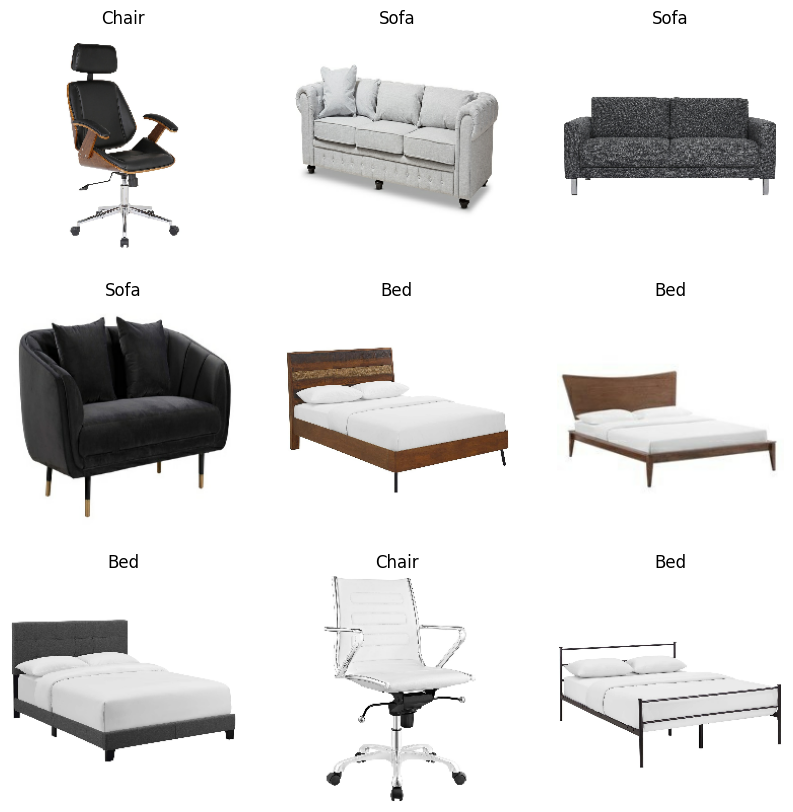

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [8]:
data_augmentation = keras.Sequential(
  [
    RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
  ]
)

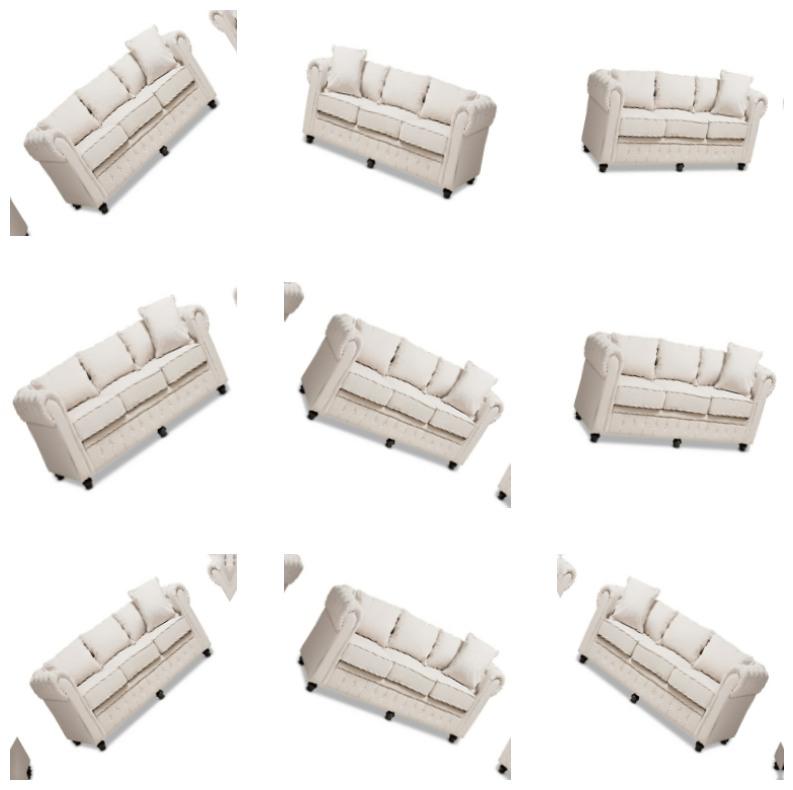

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  Rescaling(1./255),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [13]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
8/8 [==============================] - 27s 2s/step - loss: 1.6166 - accuracy: 0.3375 - val_loss: 1.0584 - val_accuracy: 0.3667
Epoch 2/15
8/8 [==============================] - 15s 1s/step - loss: 1.0038 - accuracy: 0.5083 - val_loss: 0.7264 - val_accuracy: 0.6333
Epoch 3/15
8/8 [==============================] - 15s 2s/step - loss: 0.7172 - accuracy: 0.6958 - val_loss: 0.6112 - val_accuracy: 0.6333
Epoch 4/15
8/8 [==============================] - 17s 2s/step - loss: 0.4991 - accuracy: 0.8042 - val_loss: 0.5319 - val_accuracy: 0.7667
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 0.5091 - accuracy: 0.7917 - val_loss: 0.3884 - val_accuracy: 0.8333
Epoch 6/15
8/8 [==============================] - 18s 2s/step - loss: 0.4689 - accuracy: 0.8167 - val_loss: 0.2375 - val_accuracy: 0.9000
Epoch 7/15
8/8 [==============================] - 16s 2s/step - loss: 0.3450 - accuracy: 0.8708 - val_loss: 0.4354 - val_accuracy: 0.8000
Epoch 8/15
8/8 [==================

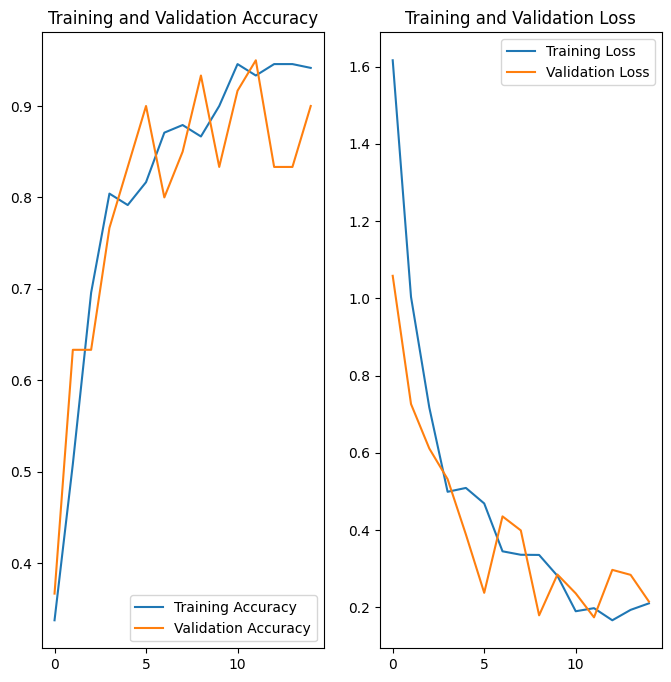

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
image_path = "image.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 444ms/step


NameError: name 'np' is not defined

In [ ]:
model.save('model.h5')


In [ ]:
reconstructed_model = keras.models.load_model("model.h5")


In [ ]:
image_path = "image.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = reconstructed_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is most likely a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))